# Setup + Loading Data

In [1]:
# Importing packages

import json
from pathlib import Path
import pprint
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import utilities_visualization

In [2]:
# Defining input and output directory

with open("data_2025-09-03 Euler Angles_20250903_203926.json", 'r') as f:
    data_dict = json.load(f)
OUT_DIR = Path("out")

# make the output directory if it does not exist
if not OUT_DIR.exists():
    OUT_DIR.mkdir()

In [3]:
print("Data Dictionary Structure:")
print(f"{pprint.pformat(data_dict, depth=2)[:210]}\n...")
print(f"{len(list(data_dict['OR'].keys()))} Quantities Included:")
print([data_dict['OR'].keys()])

Data Dictionary Structure:
{'IB': {'Ax': [...],
        'Ay': [...],
        'Az': [...],
        'ax': [...],
        'ay': [...],
        'az': [...],
        'dx': [...],
        'dy': [...],
        'dz': [...],
        'phi': [...],
...
23 Quantities Included:
[dict_keys(['time', 'ax', 'ay', 'az', 'phi', 'theta', 'psi', 'wx', 'wy', 'wz', 'wxy', 'phidot', 'thetadot', 'psidot', 'Ax', 'Ay', 'Az', 'dx', 'dy', 'dz', 'vx', 'vy', 'vz'])]


In [4]:
def data_to_array(data_dict,
                quantities={
                    'IB':['wx','wy','wz'],
                    'IT':['wx','wy','wz'],
                    'IL':['wx','wy','wz'],
                    'OR':['wxy','psidot'],
                },
                ntime=None):
    """
    Returns an array with shape = (ntime, nquantities)
    Returns an array with shape = (1894,  11)
    """
    data_array = [data_dict[s][q] for s,qset in quantities.items() for q in qset]
    if ntime is not None:
        return np.array(data_array).T[:ntime]
    else:
        return np.array(data_array).T

# PCA

In [5]:
# Step 1: Load data
X = data_to_array(data_dict=data_dict)
print(np.shape(X))

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=np.shape(X)[1])
X_pca = pca.fit_transform(X_scaled)
# Get the eigenvectors (principal directions)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

X_PCA_hftc = X_pca 

(1894, 11)


In [6]:
explained_variance_ratio

array([0.39183673, 0.2377795 , 0.1373963 , 0.07836422, 0.04293685,
       0.03900221, 0.03041829, 0.01510599, 0.01428139, 0.00858478,
       0.00429373])

In [7]:
quantities={
    'IB':['wx','wy','wz'],
    'IT':['wx','wy','wz'],
    'IL':['wx','wy','wz'],
    'OR':['wxy','psidot'],
}

In [42]:
def plot_PCA_modes_by_segment(eigenvectors, quantities, n_modes=6):
    sensors = []
    mapping = [[] for _ in quantities]

    for i,(sensor,qset) in enumerate(quantities.items()):
        sensors.append(sensor)
        for q in qset:
            mapping[i].append(q)
    
    n_rows = n_modes
    n_sensors = len(sensors)
    n_cols = n_sensors

    fig,ax = plt.subplots(n_rows, n_cols,
                          gridspec_kw={'width_ratios': [3,3,3,1.6]},
                          figsize=(6.5, n_modes),
                          sharex='col',
                          sharey=True, 
                          constrained_layout=True
                          )

    for j,s in enumerate(sensors): # Each column is a sensor with nq quantities
        col_idx = 0
        nq = len(mapping[j])
        for i in range(n_rows): # Each row is a mode with n_senors sensors
            ax[i,j].plot(eigenvectors[i, col_idx:col_idx+nq], '.', markersize=12)
            ax[i,j].axhline(0, color='gray', linestyle='--', linewidth=0.8)
            ax[i,j].set_ylim(-1, 1)
            ax[i,0].set_ylabel(rf"$\xi_{{{i+1}}}$")
        col_idx += nq
        ax[-1,j].set_xticks(np.arange(nq))
        ax[-1,j].set_xticklabels(mapping[j],rotation=45)
        ax[-1,j].set_xlabel(s)
        ax[-1,-1].set_xlim(-0.1,1.11)

        plt.savefig('PCA_modes_by_segment.pdf', dpi=400)

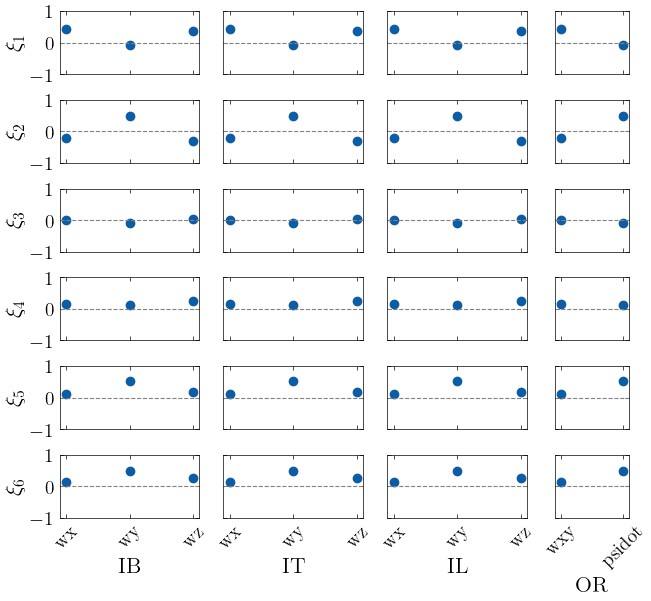

In [43]:
plot_PCA_modes_by_segment(eigenvectors,quantities)